In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv',encoding='cp949')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15653610 entries, 0 to 15653609
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   시간       object 
 1   호선       int64  
 2   역번호      int64  
 3   역명       object 
 4   상하구분     object 
 5   AWS지점코드  int64  
 6   기온       float64
 7   풍향       float64
 8   풍속       float64
 9   일강수량     float64
 10  시간강수량    float64
 11  상대습도     float64
 12  일사량      float64
 13  체감온도     float64
 14  혼잡도      float64
 15  승차총승객수   float64
 16  하차총승객수   float64
 17  미세먼지     float64
dtypes: float64(12), int64(3), object(3)
memory usage: 2.1+ GB


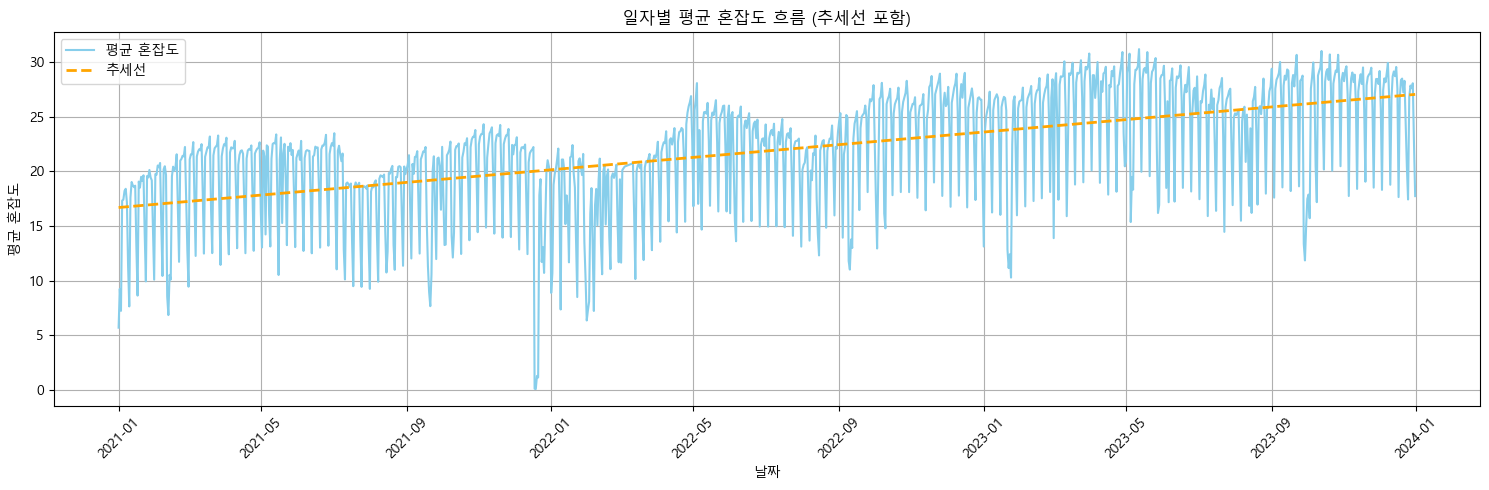

In [10]:
daily_avg['일'] = pd.to_datetime(daily_avg['일'])

daily_avg['일수'] = (daily_avg['일'] - daily_avg['일'].min()).dt.days


coeffs = np.polyfit(daily_avg['일수'], daily_avg['혼잡도'], 1)
trend = np.poly1d(coeffs)


plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 5))
plt.plot(daily_avg['일'], daily_avg['혼잡도'], color='skyblue', linewidth=1.5, label='평균 혼잡도')
plt.plot(daily_avg['일'], trend(daily_avg['일수']), color='orange', linestyle='--', linewidth=2, label='추세선')
plt.title('일자별 평균 혼잡도 흐름 (추세선 포함)')
plt.xlabel('날짜')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

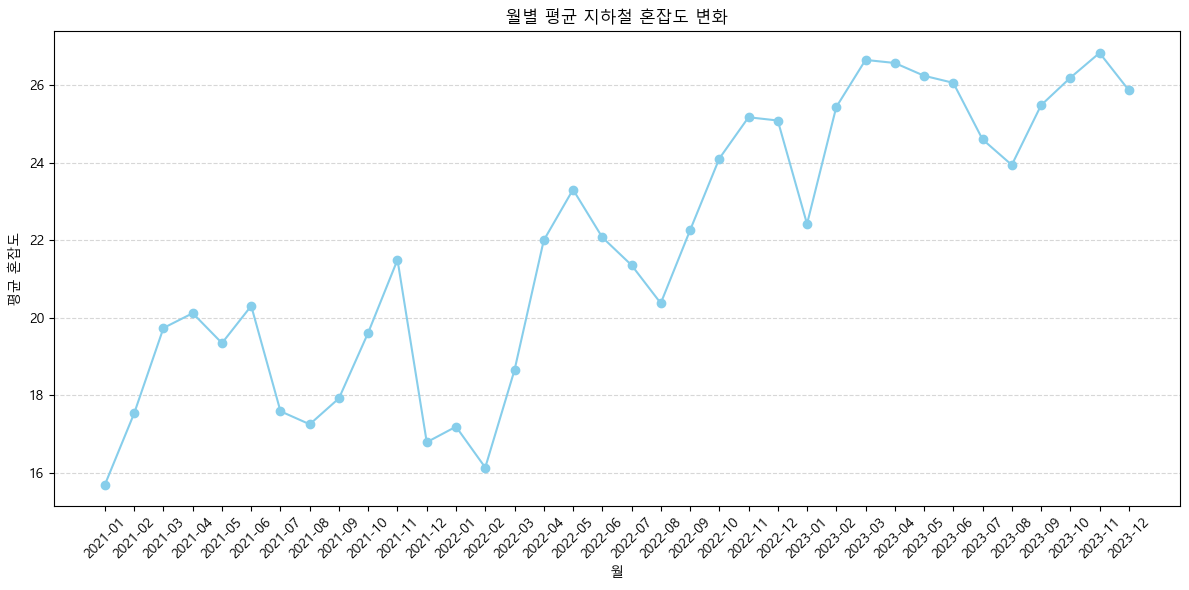

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data['시간'] = pd.to_datetime(data['시간'])
data['월'] = data['시간'].dt.to_period('M').astype(str)
monthly_congestion = data.groupby('월')['혼잡도'].mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_congestion.index, monthly_congestion.values, marker='o', color='skyblue')
plt.xlabel('월')
plt.ylabel('평균 혼잡도')
plt.title('월별 평균 지하철 혼잡도 변화')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

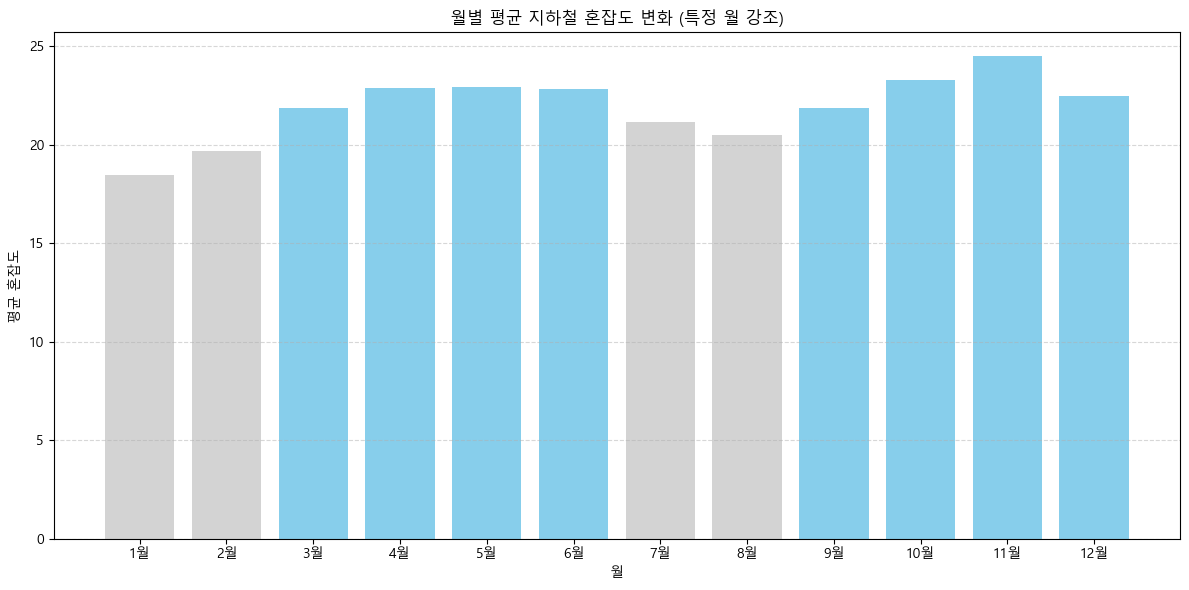

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 시간 컬럼 datetime 변환
data['시간'] = pd.to_datetime(data['시간'])
data['월'] = data['시간'].dt.month  # 월을 숫자로 추출

# 2) 월별 혼잡도 평균 계산
monthly_congestion = data.groupby('월')['혼잡도'].mean()

# 3) 강조할 월 리스트
highlight_months = [3,4,5,6,9,10,11,12]

# 4) 각 월별 색상 설정
colors = ['skyblue' if month in highlight_months else 'lightgrey' for month in monthly_congestion.index]

# 5) 그래프 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6))
bars = plt.bar(monthly_congestion.index.astype(str) + '월', monthly_congestion.values, color=colors)

plt.xlabel('월')
plt.ylabel('평균 혼잡도')
plt.title('월별 평균 지하철 혼잡도 변화 (특정 월 강조)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

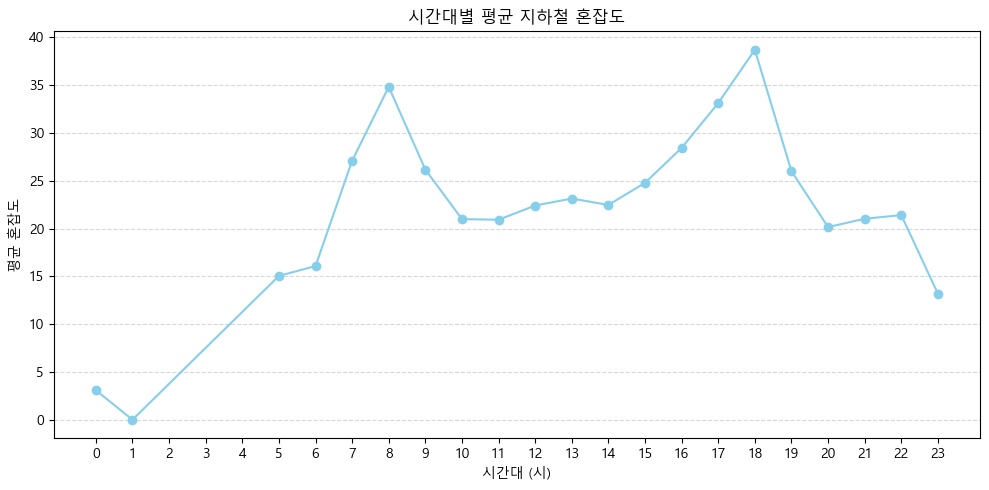

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 시간 컬럼을 datetime 타입으로 변환 (이미 변환됐으면 넘어가도 됨)
data['시간'] = pd.to_datetime(data['시간'])

# 2) 시간만 추출 (0~23시)
data['시간대'] = data['시간'].dt.hour

# 3) 시간대별 평균 혼잡도 계산
hourly_congestion = data.groupby('시간대')['혼잡도'].mean()

# 4) 그래프 그리기 (맑은 고딕, 색상 규칙 적용)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,5))
plt.plot(hourly_congestion.index, hourly_congestion.values, marker='o', color='skyblue')
plt.xlabel('시간대 (시)')
plt.ylabel('평균 혼잡도')
plt.title('시간대별 평균 지하철 혼잡도')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

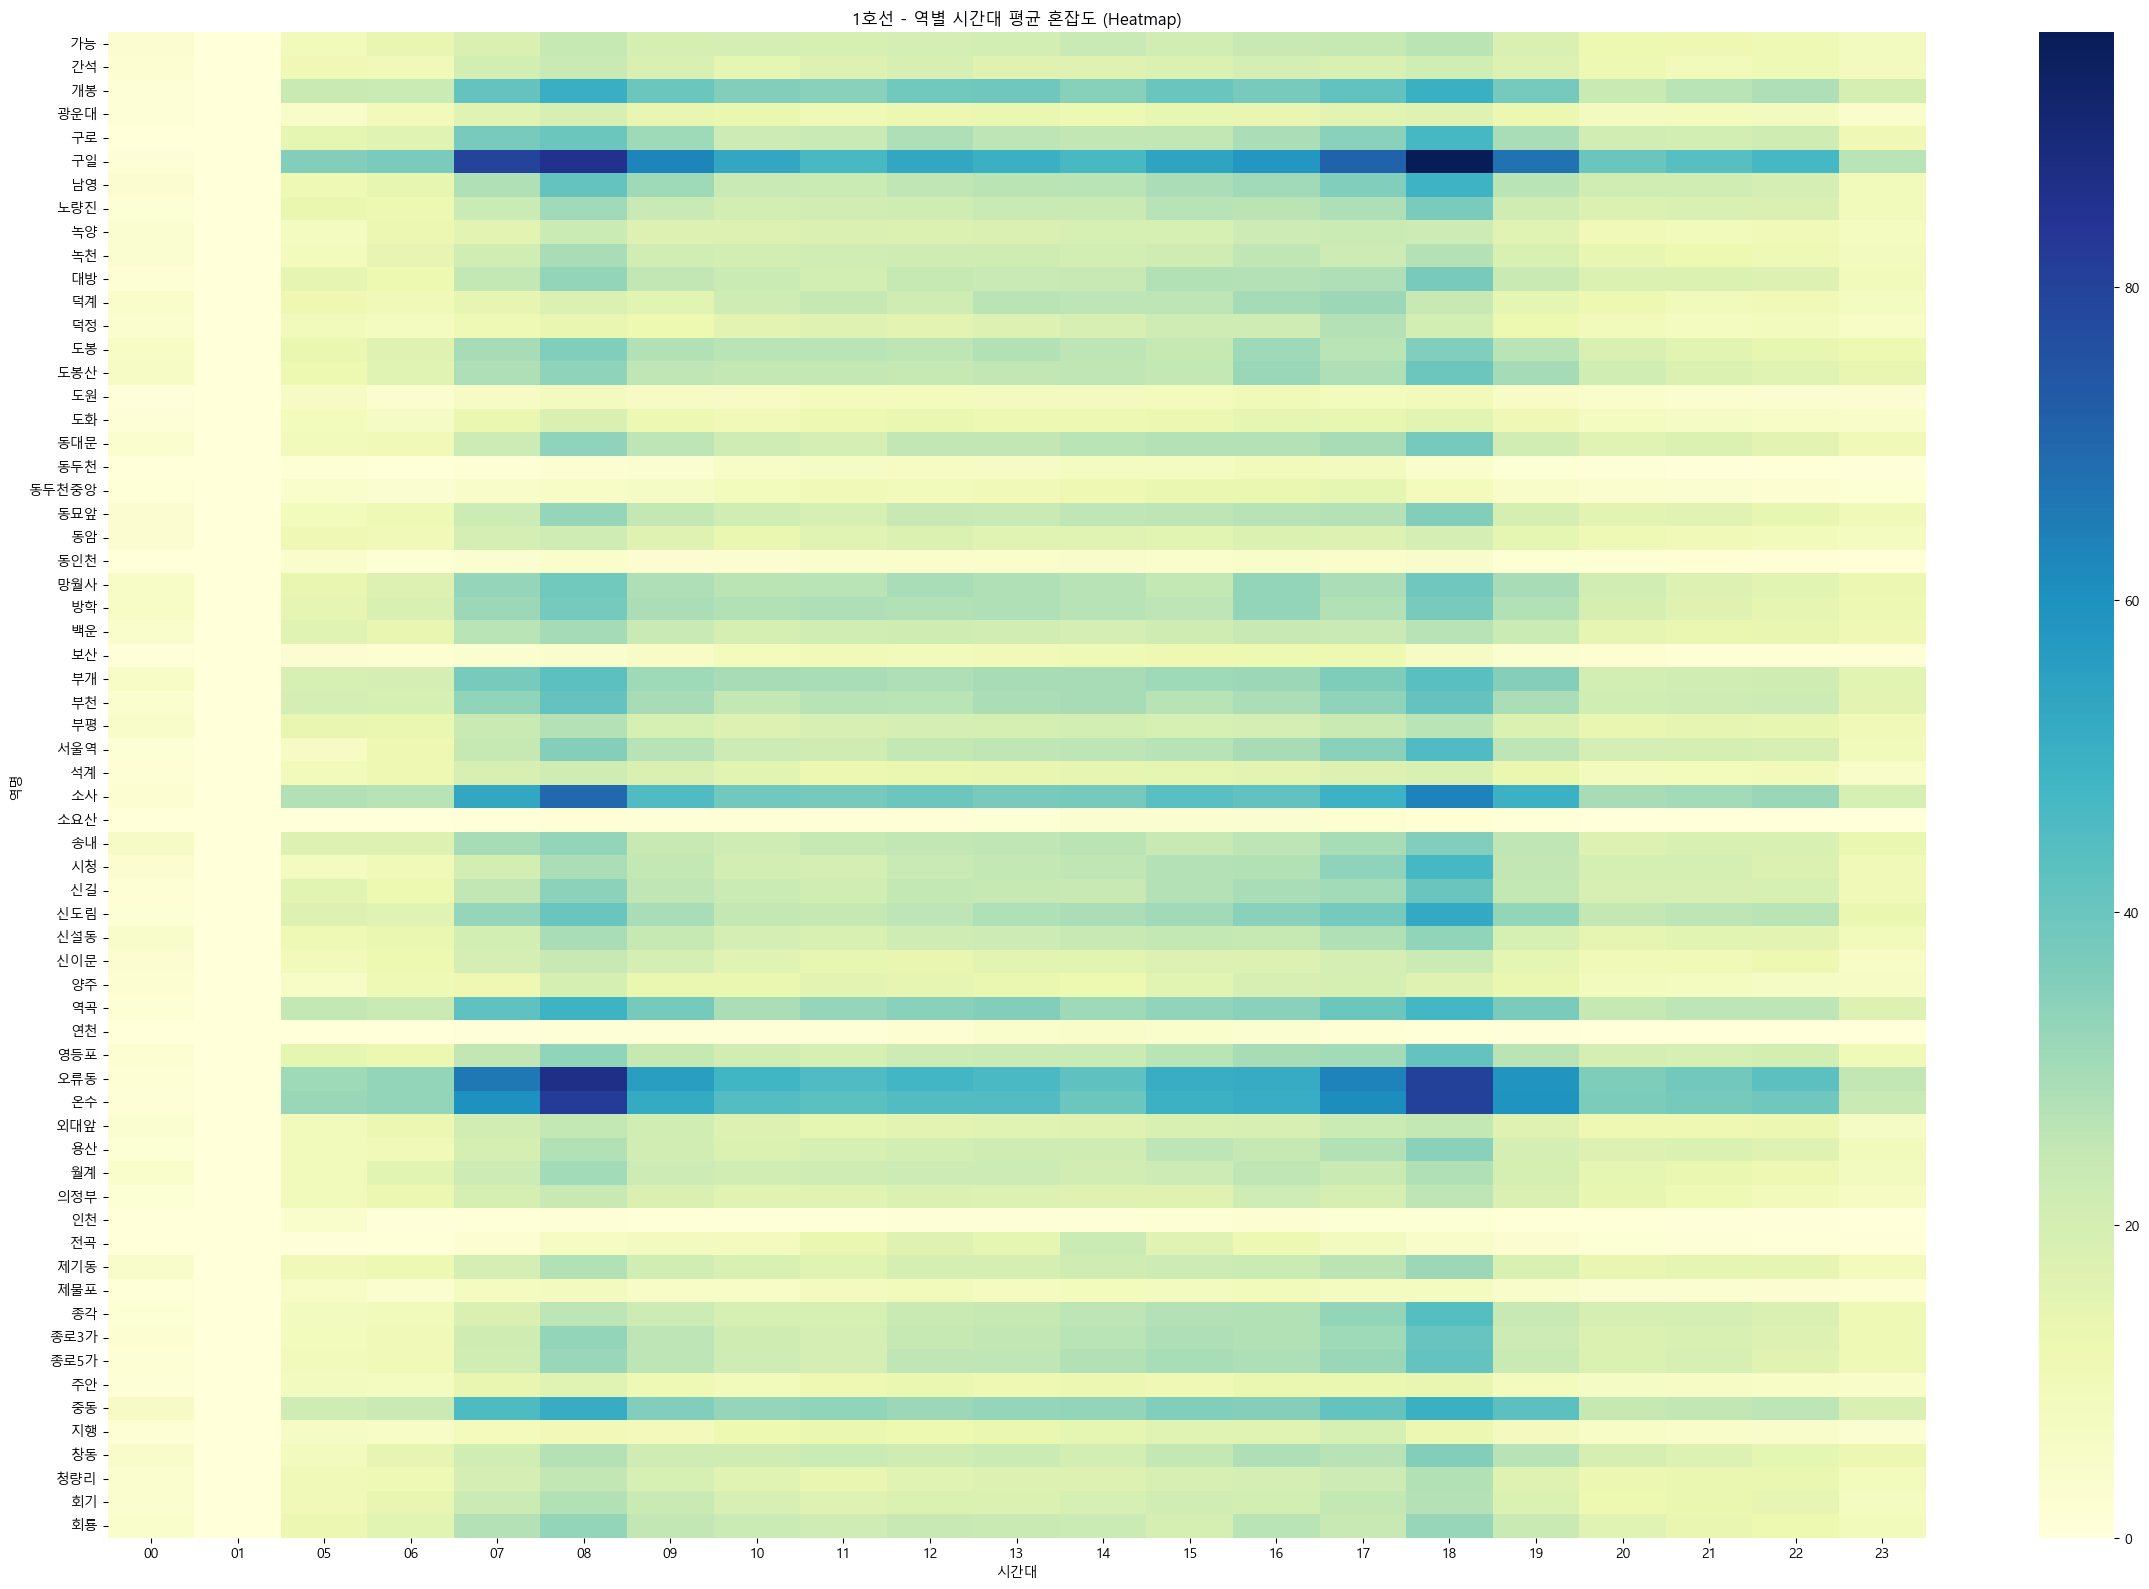

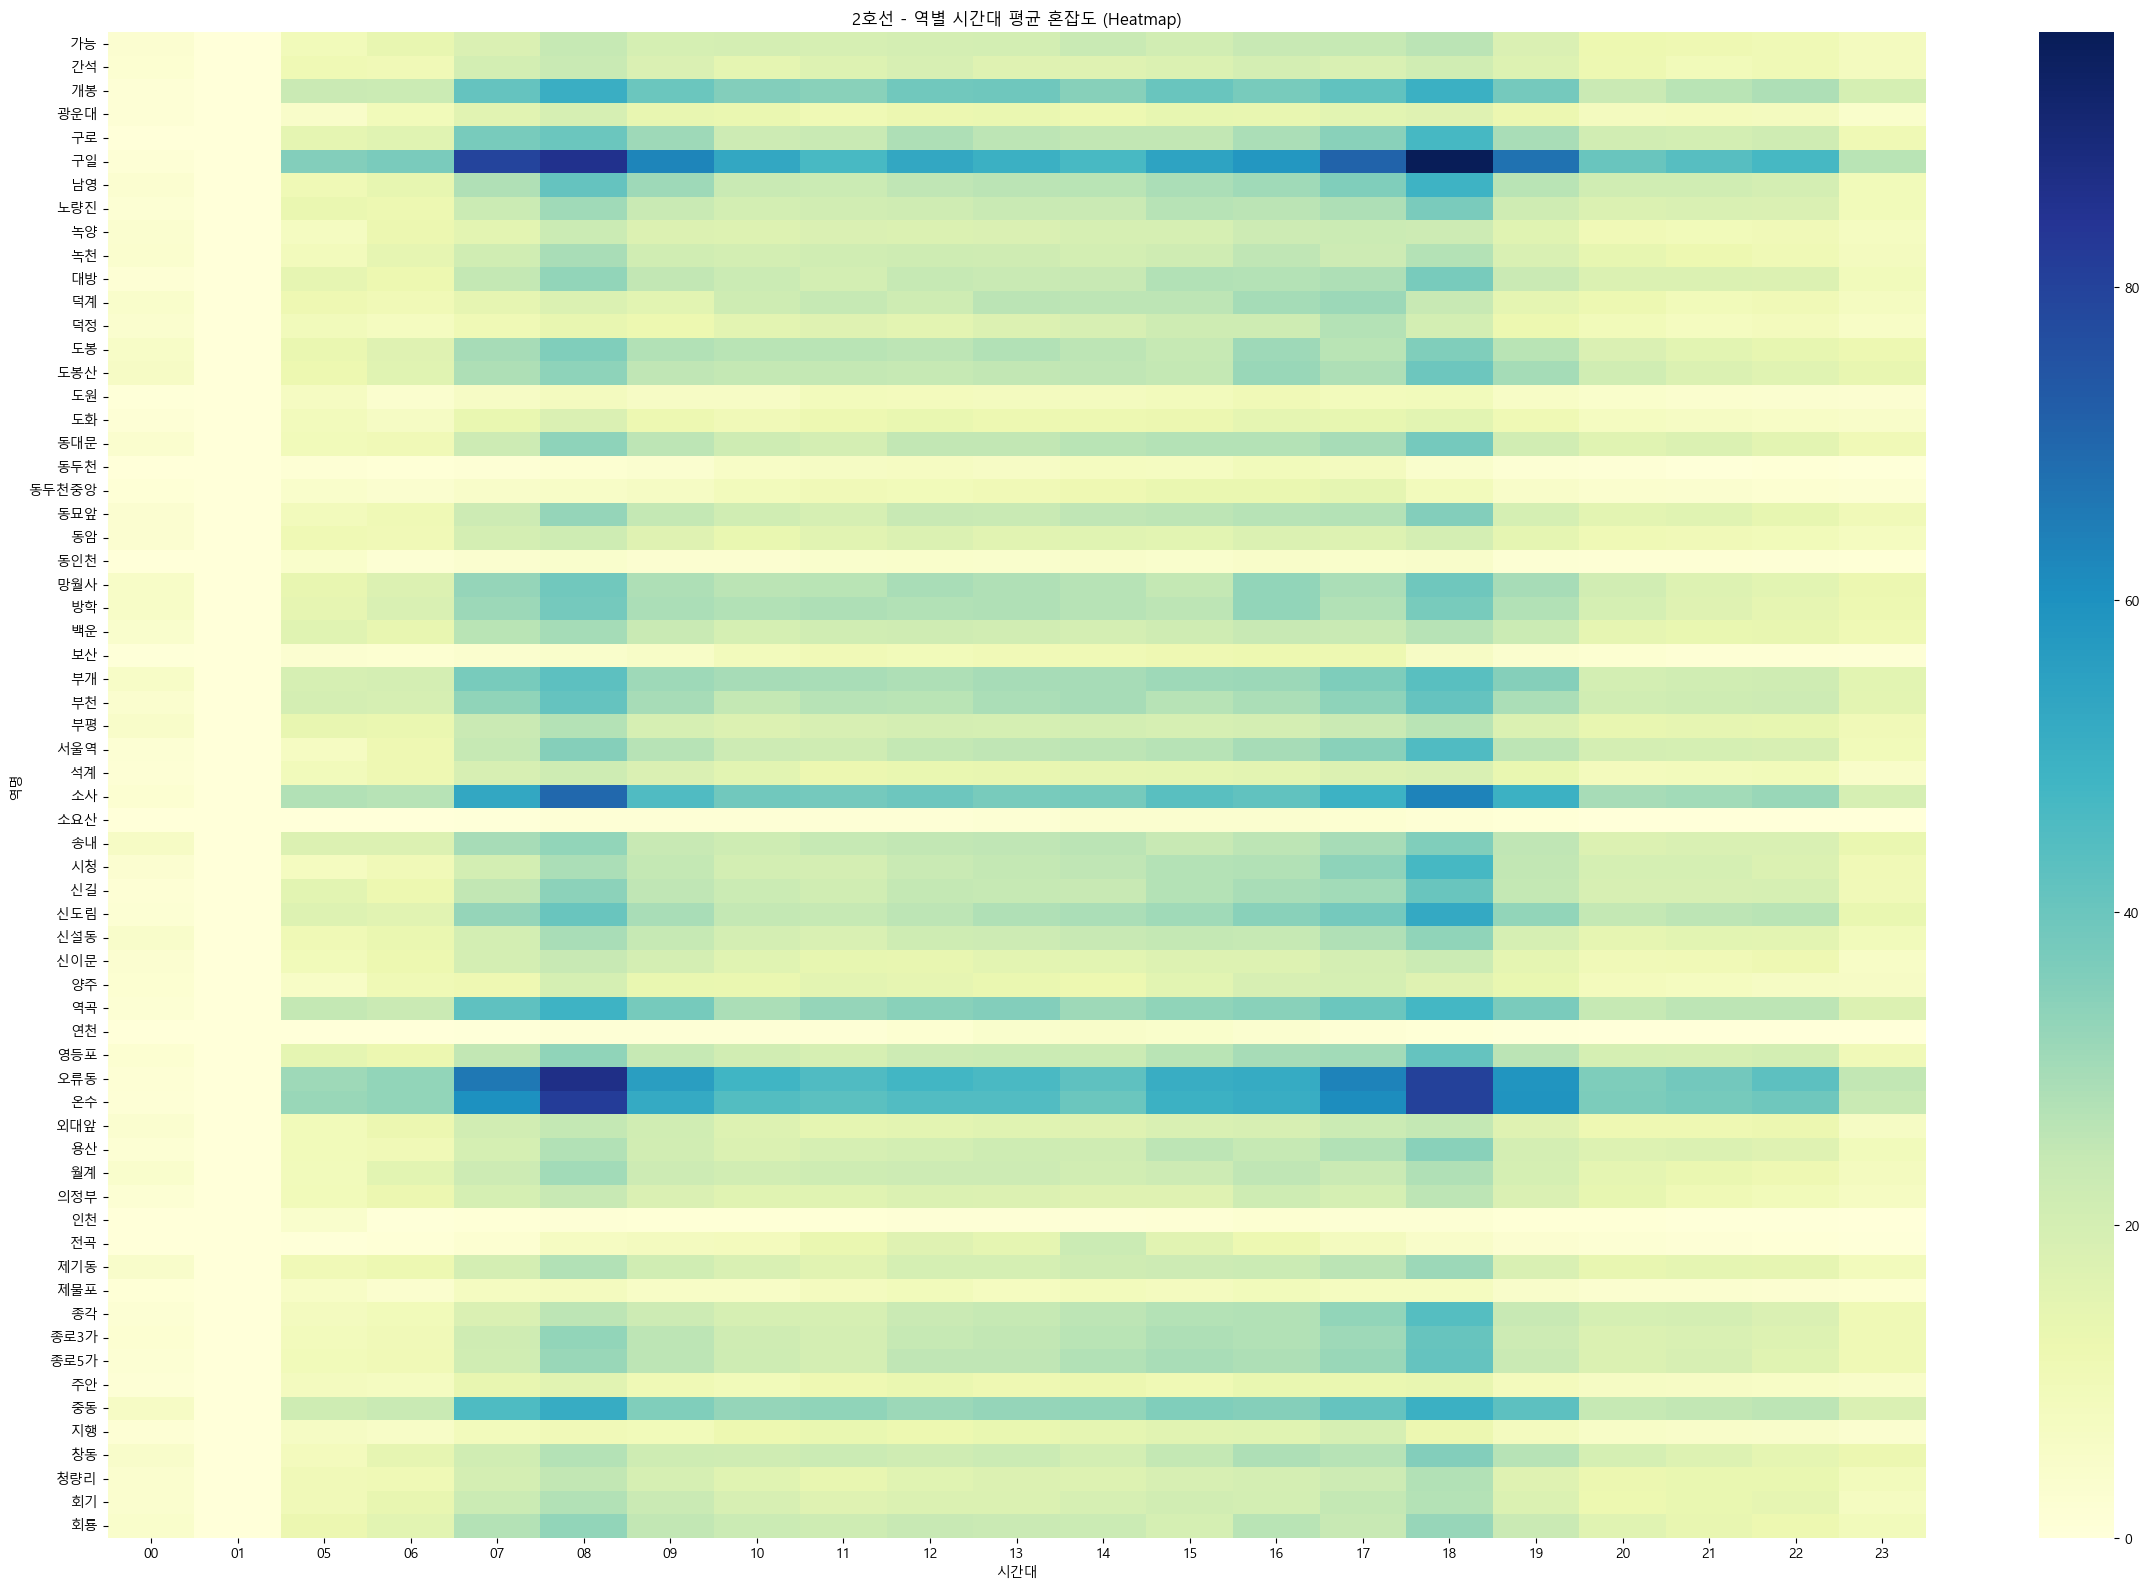

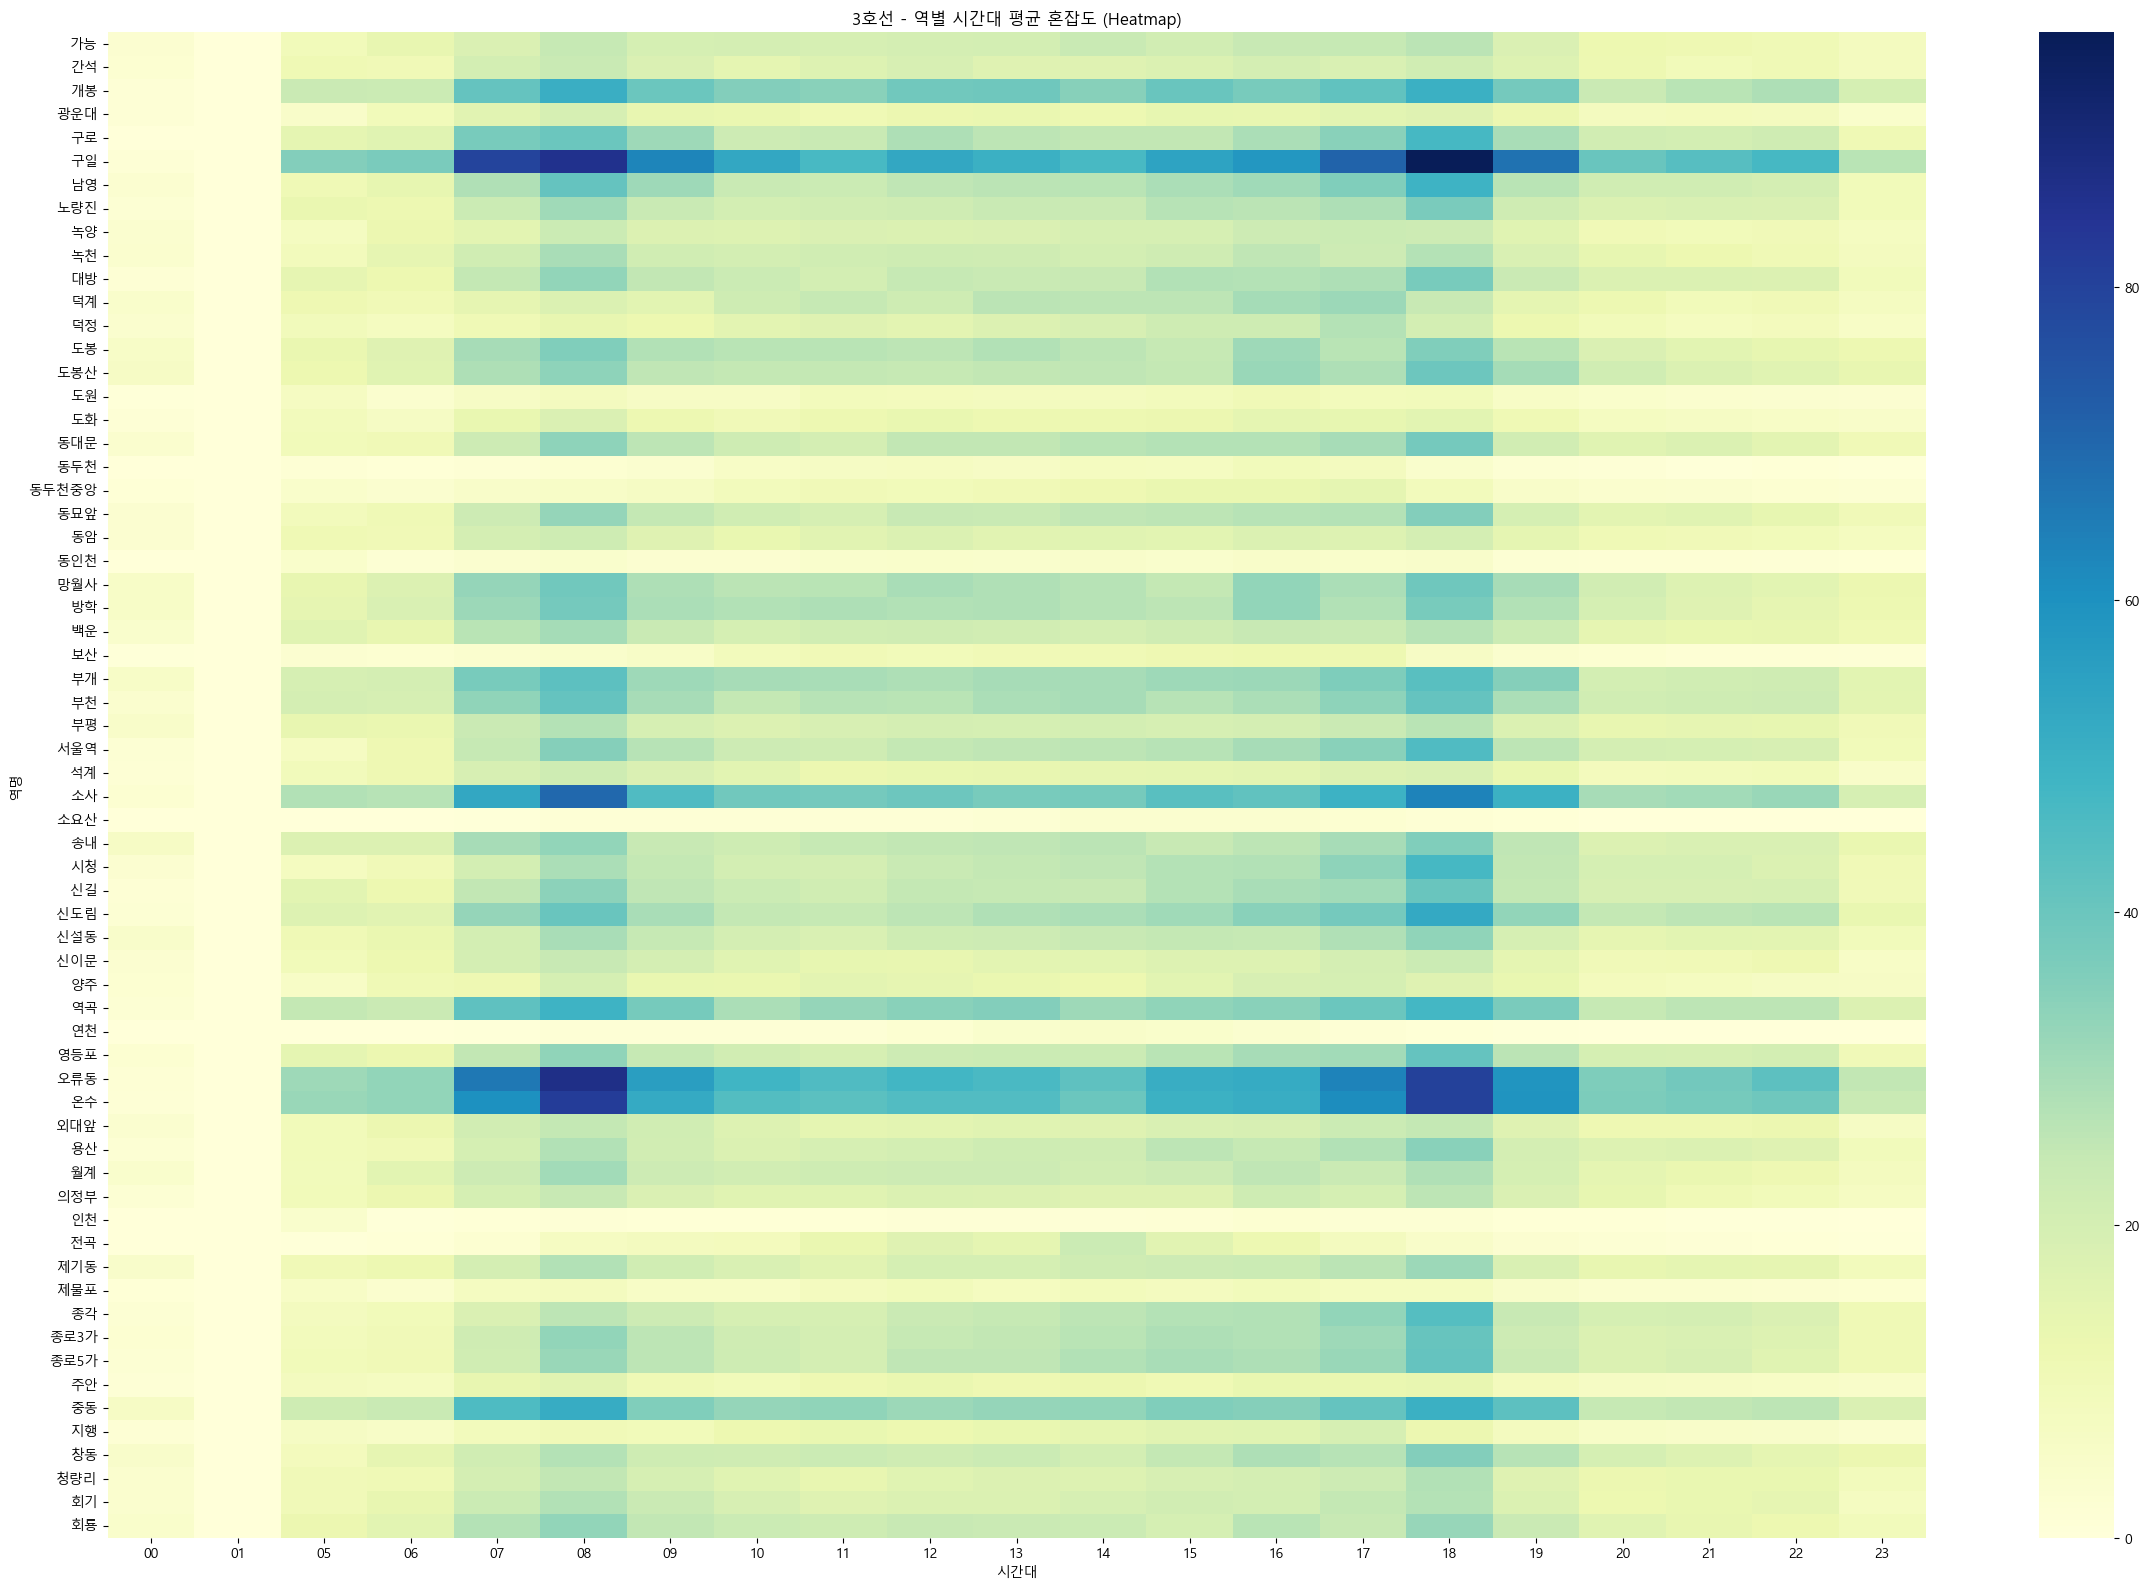

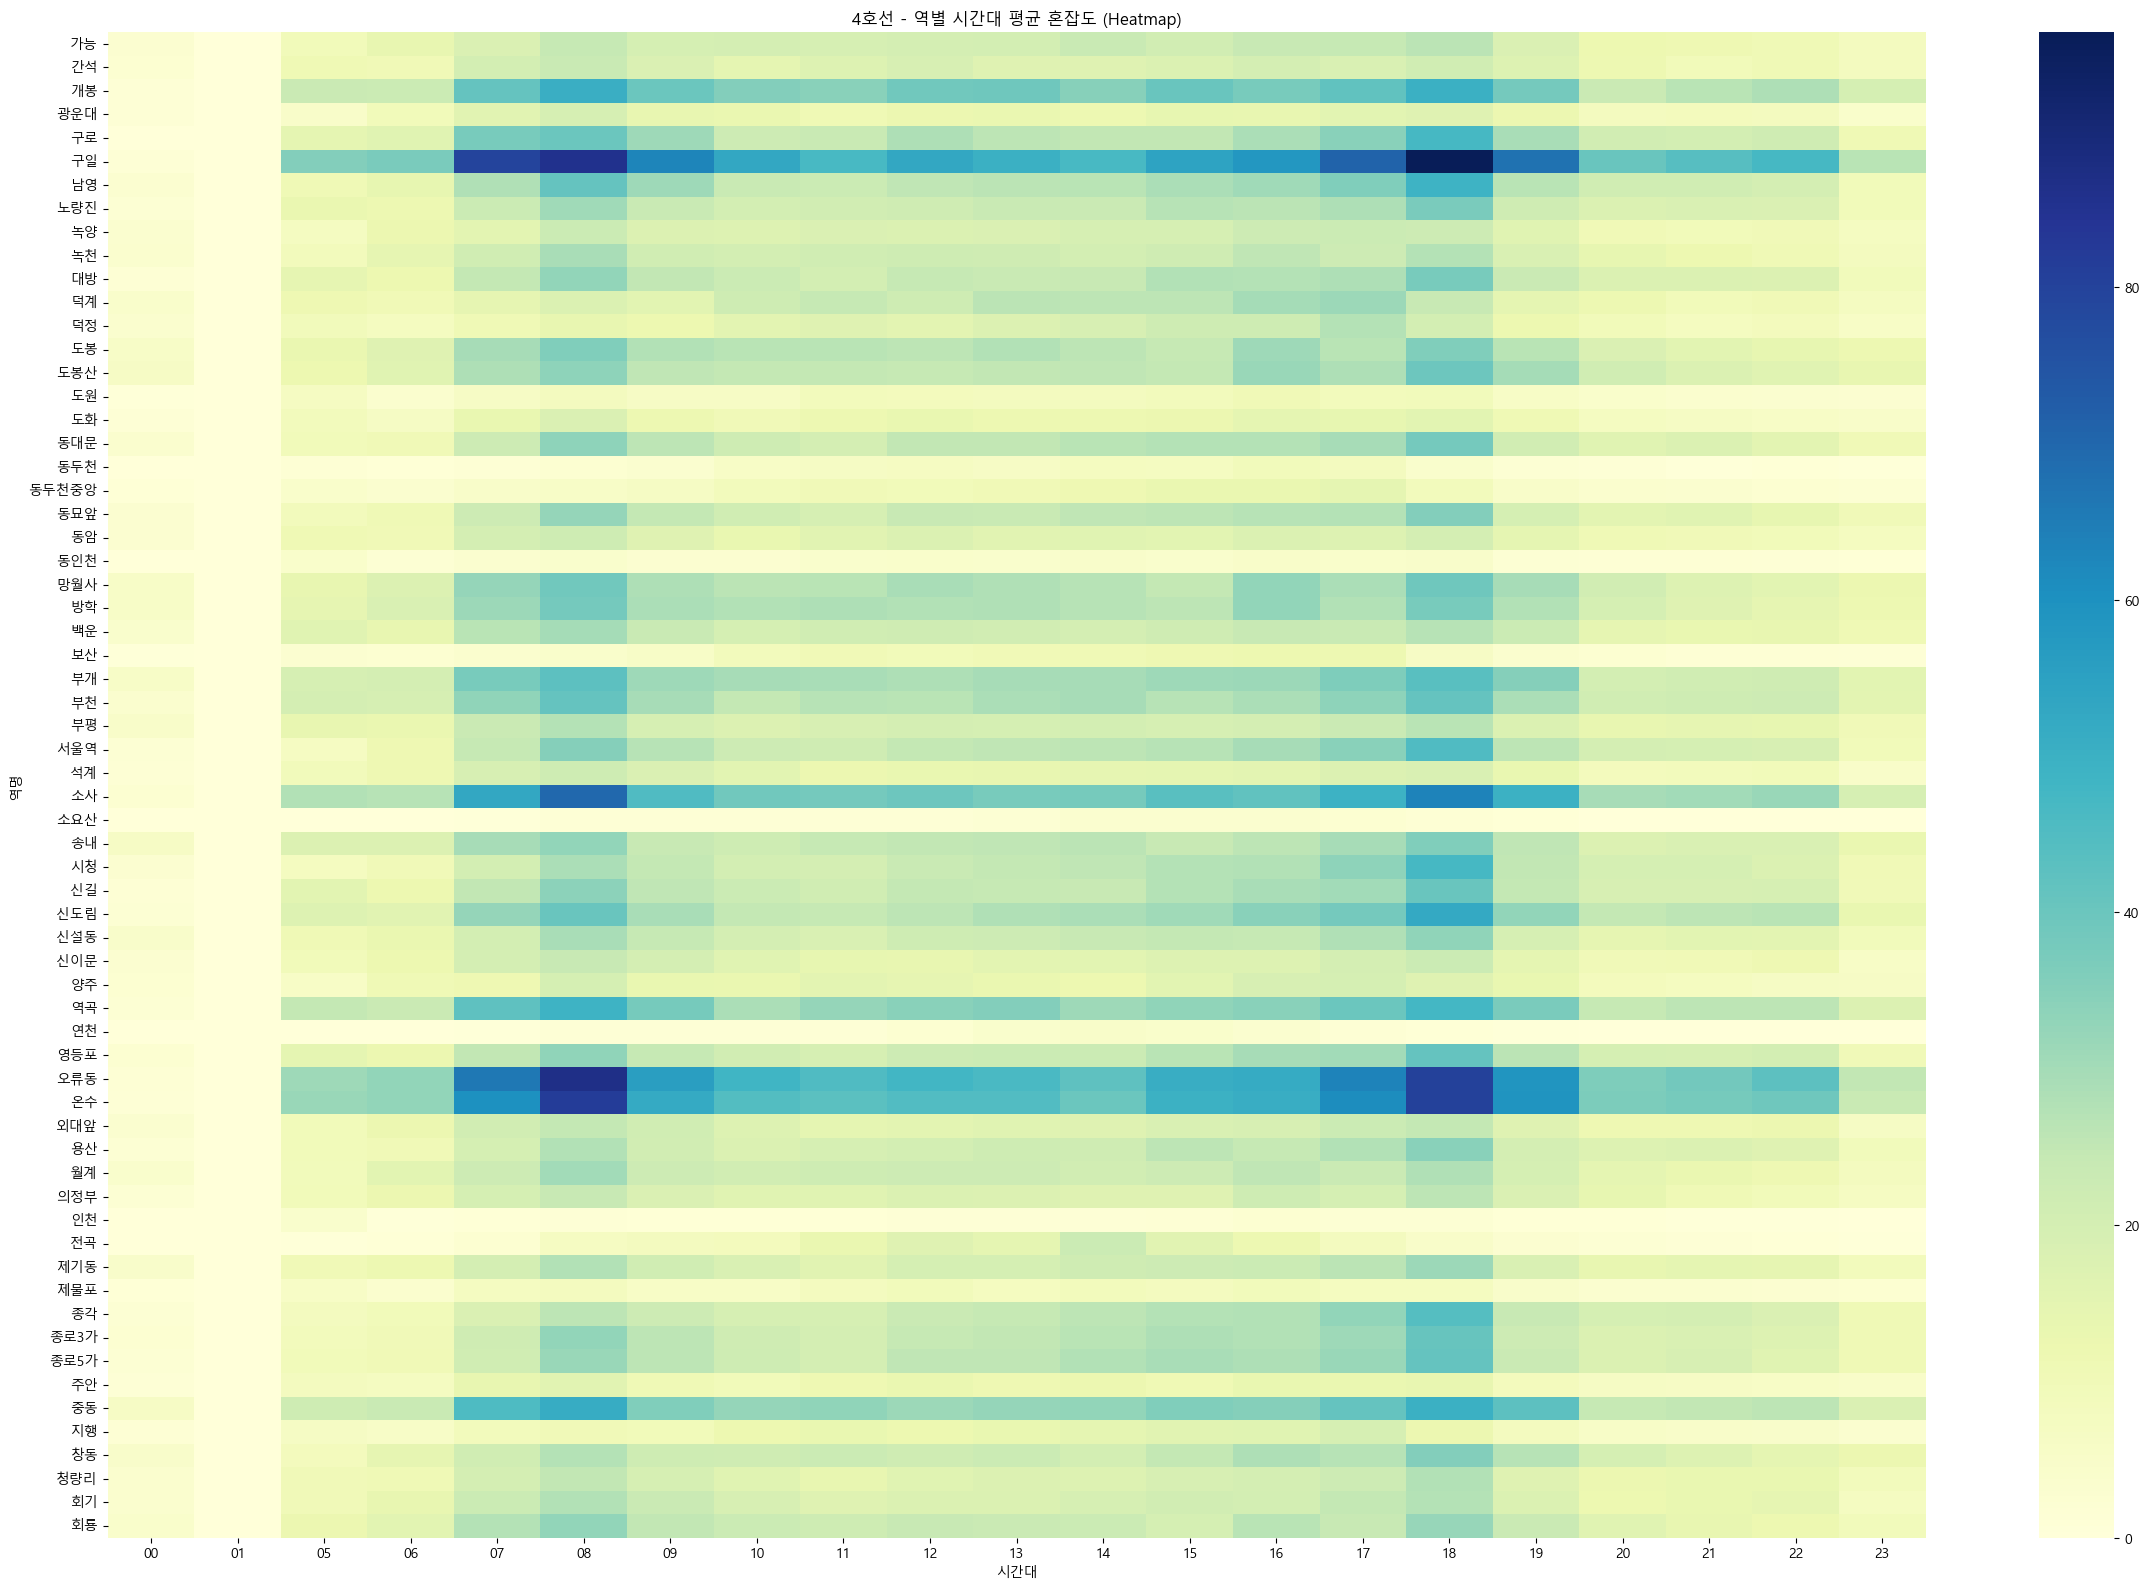

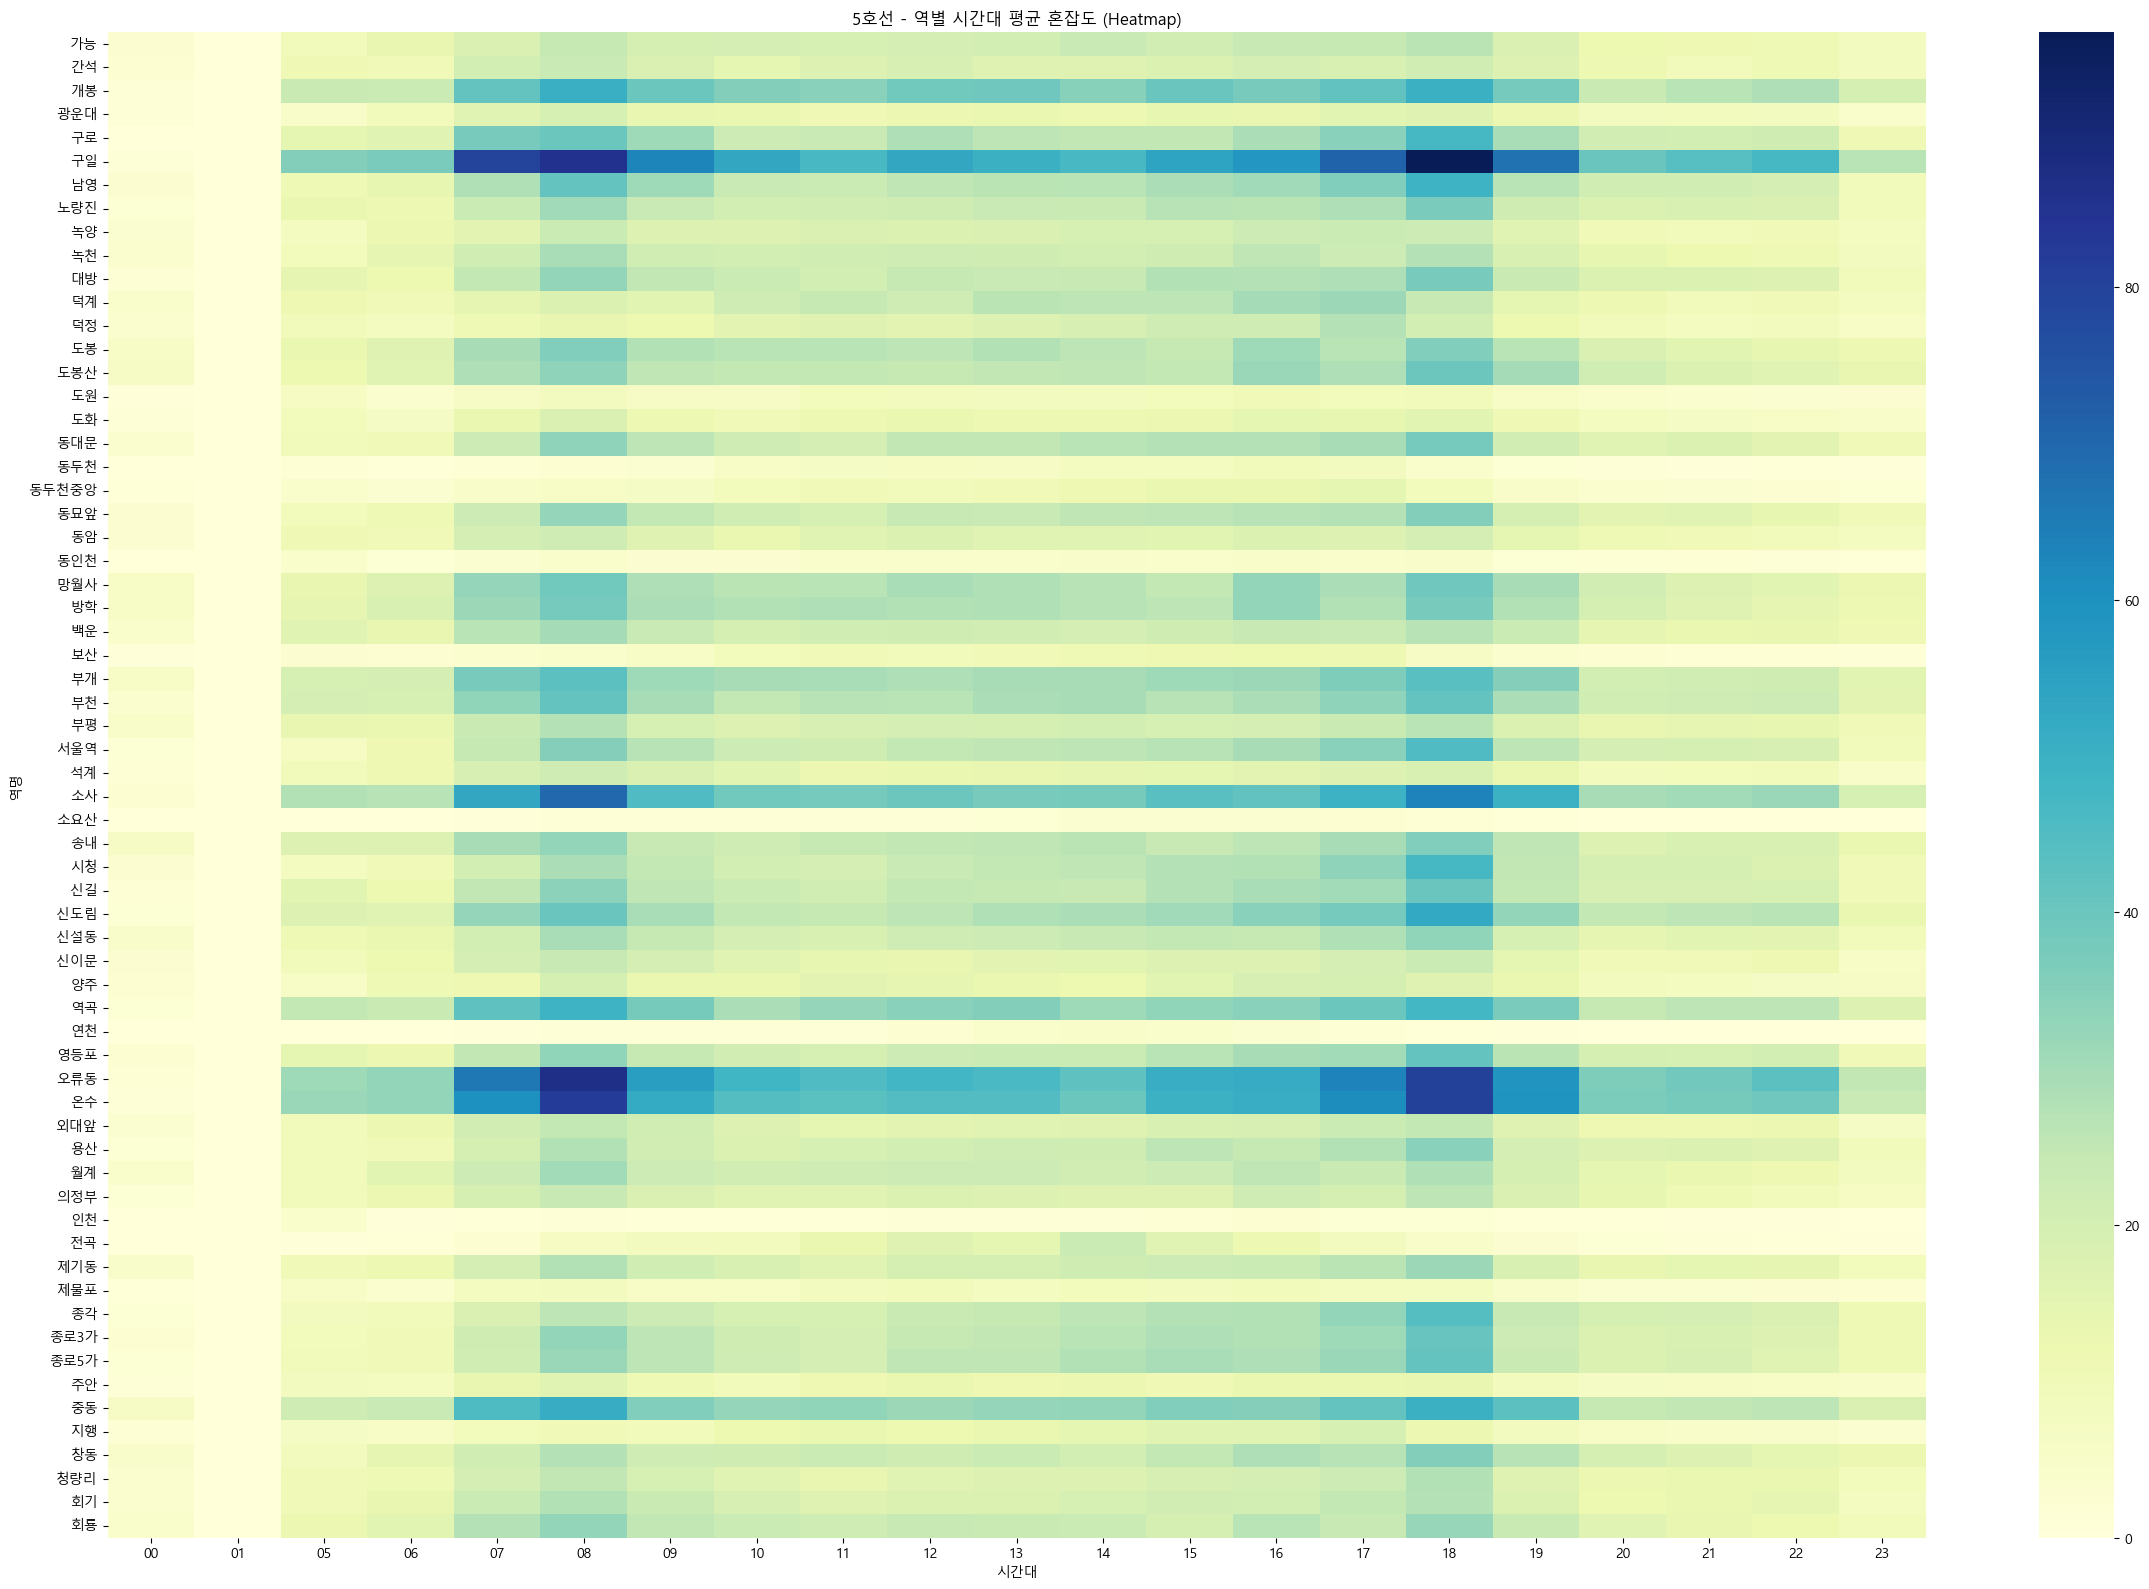

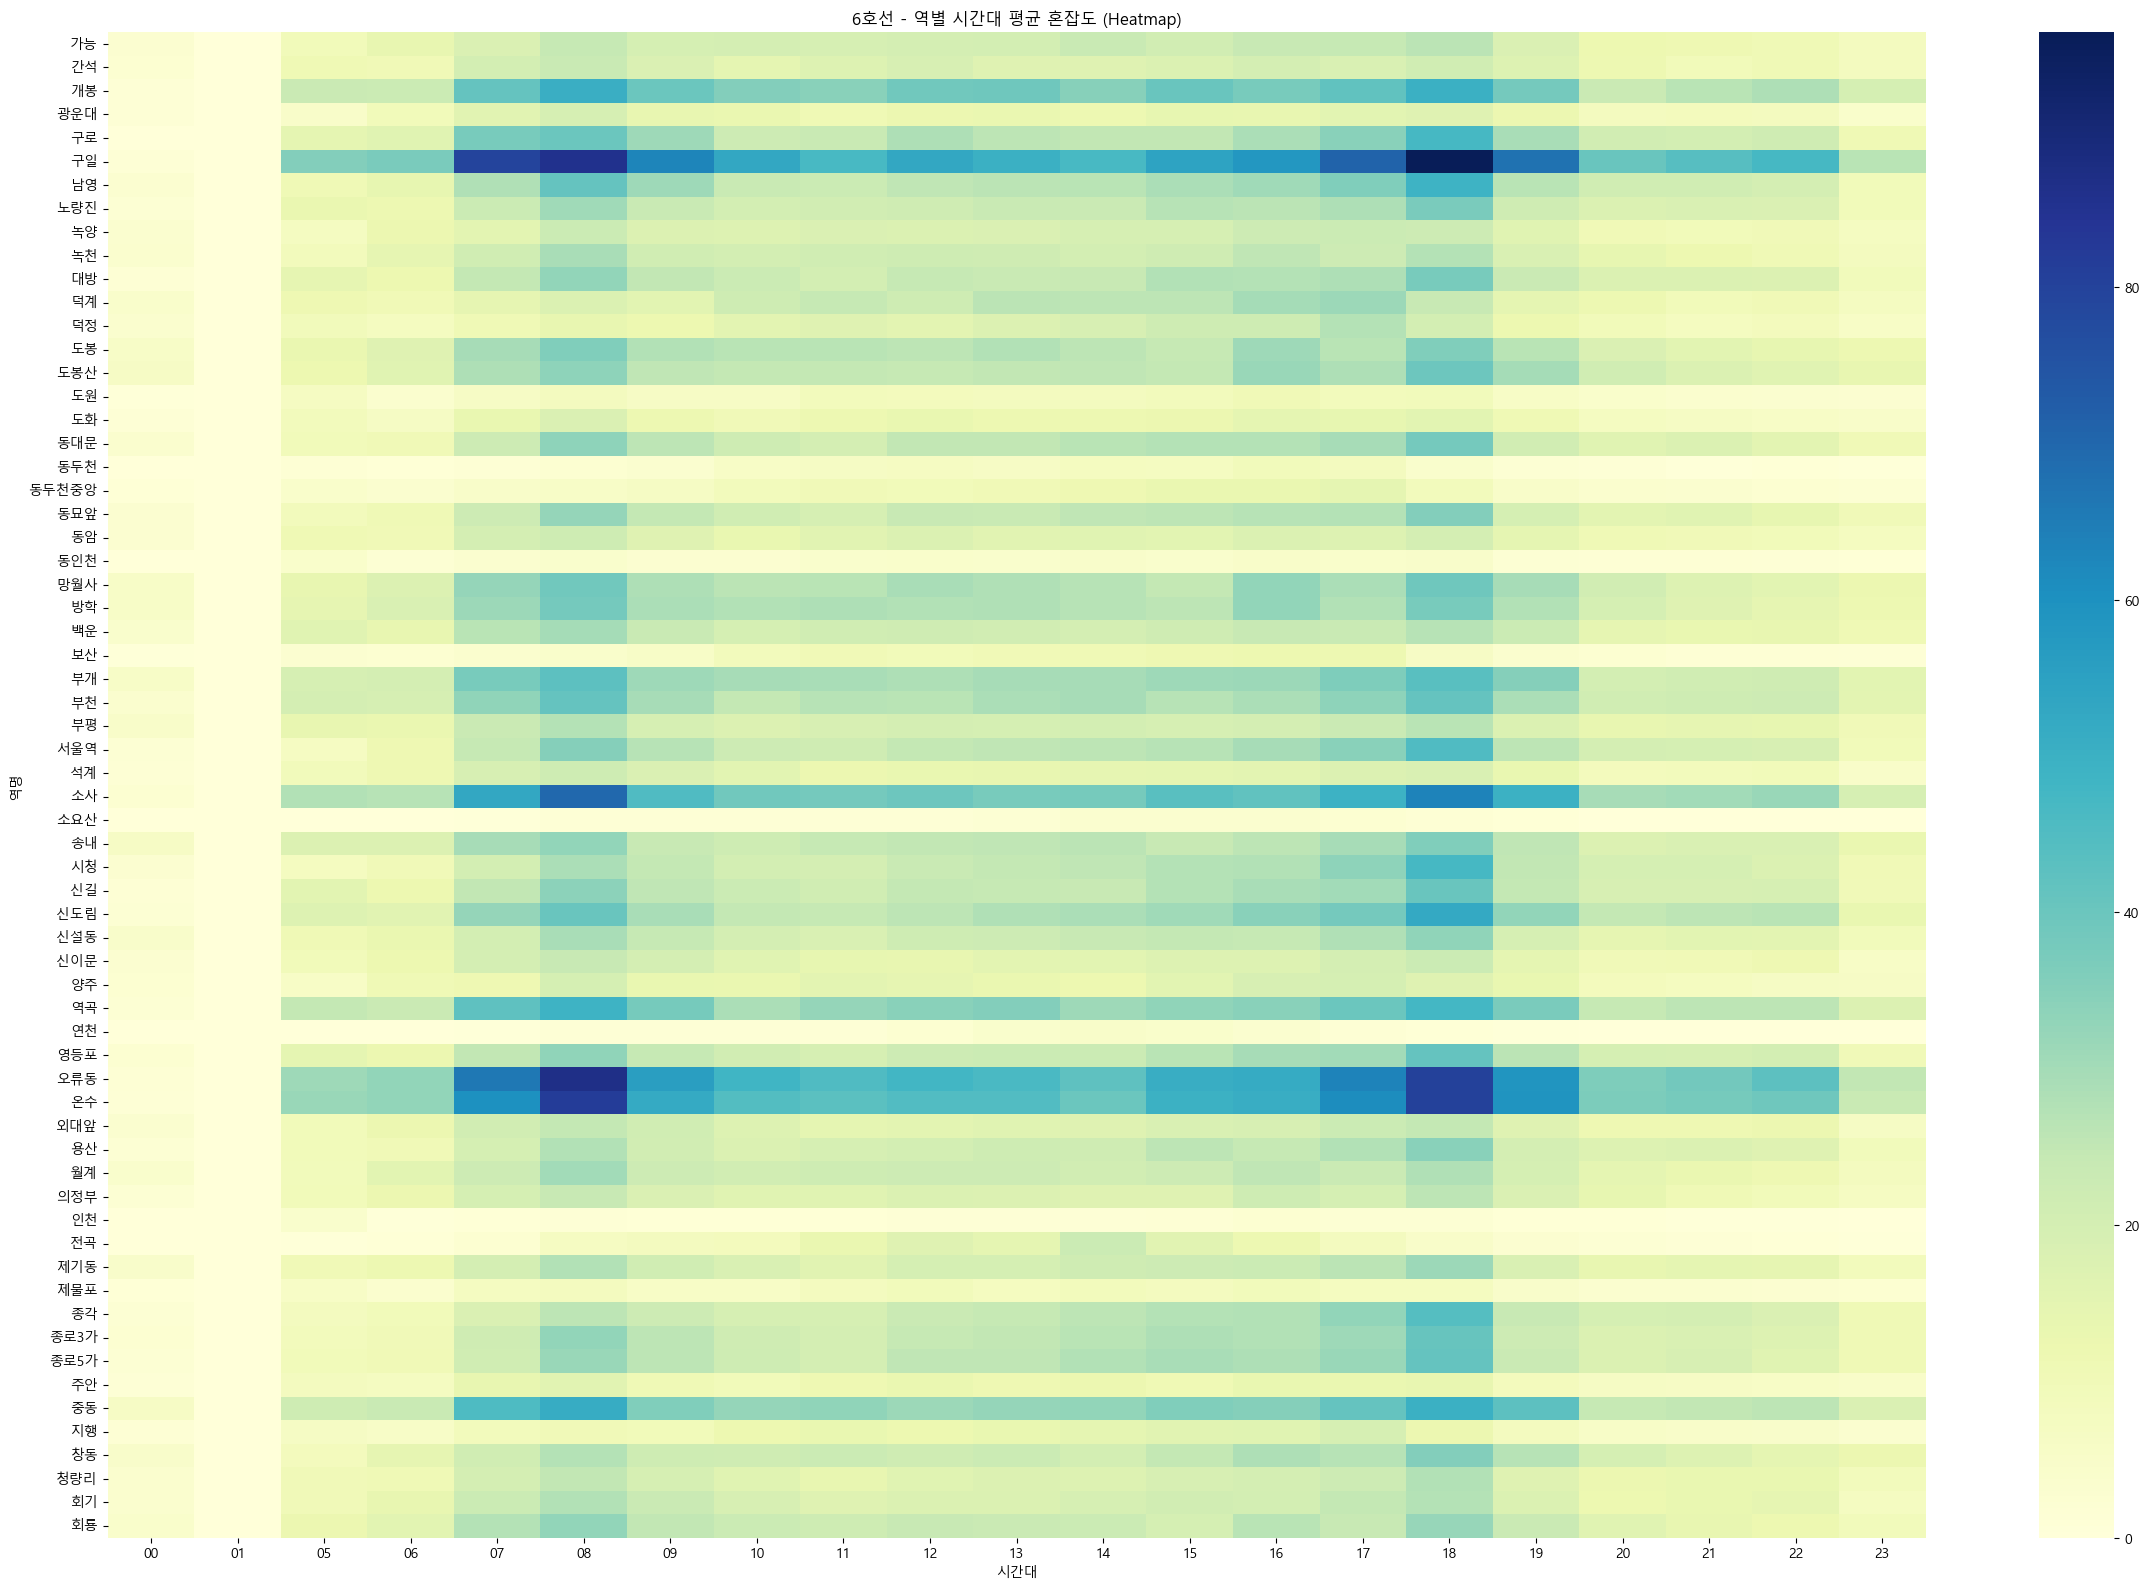

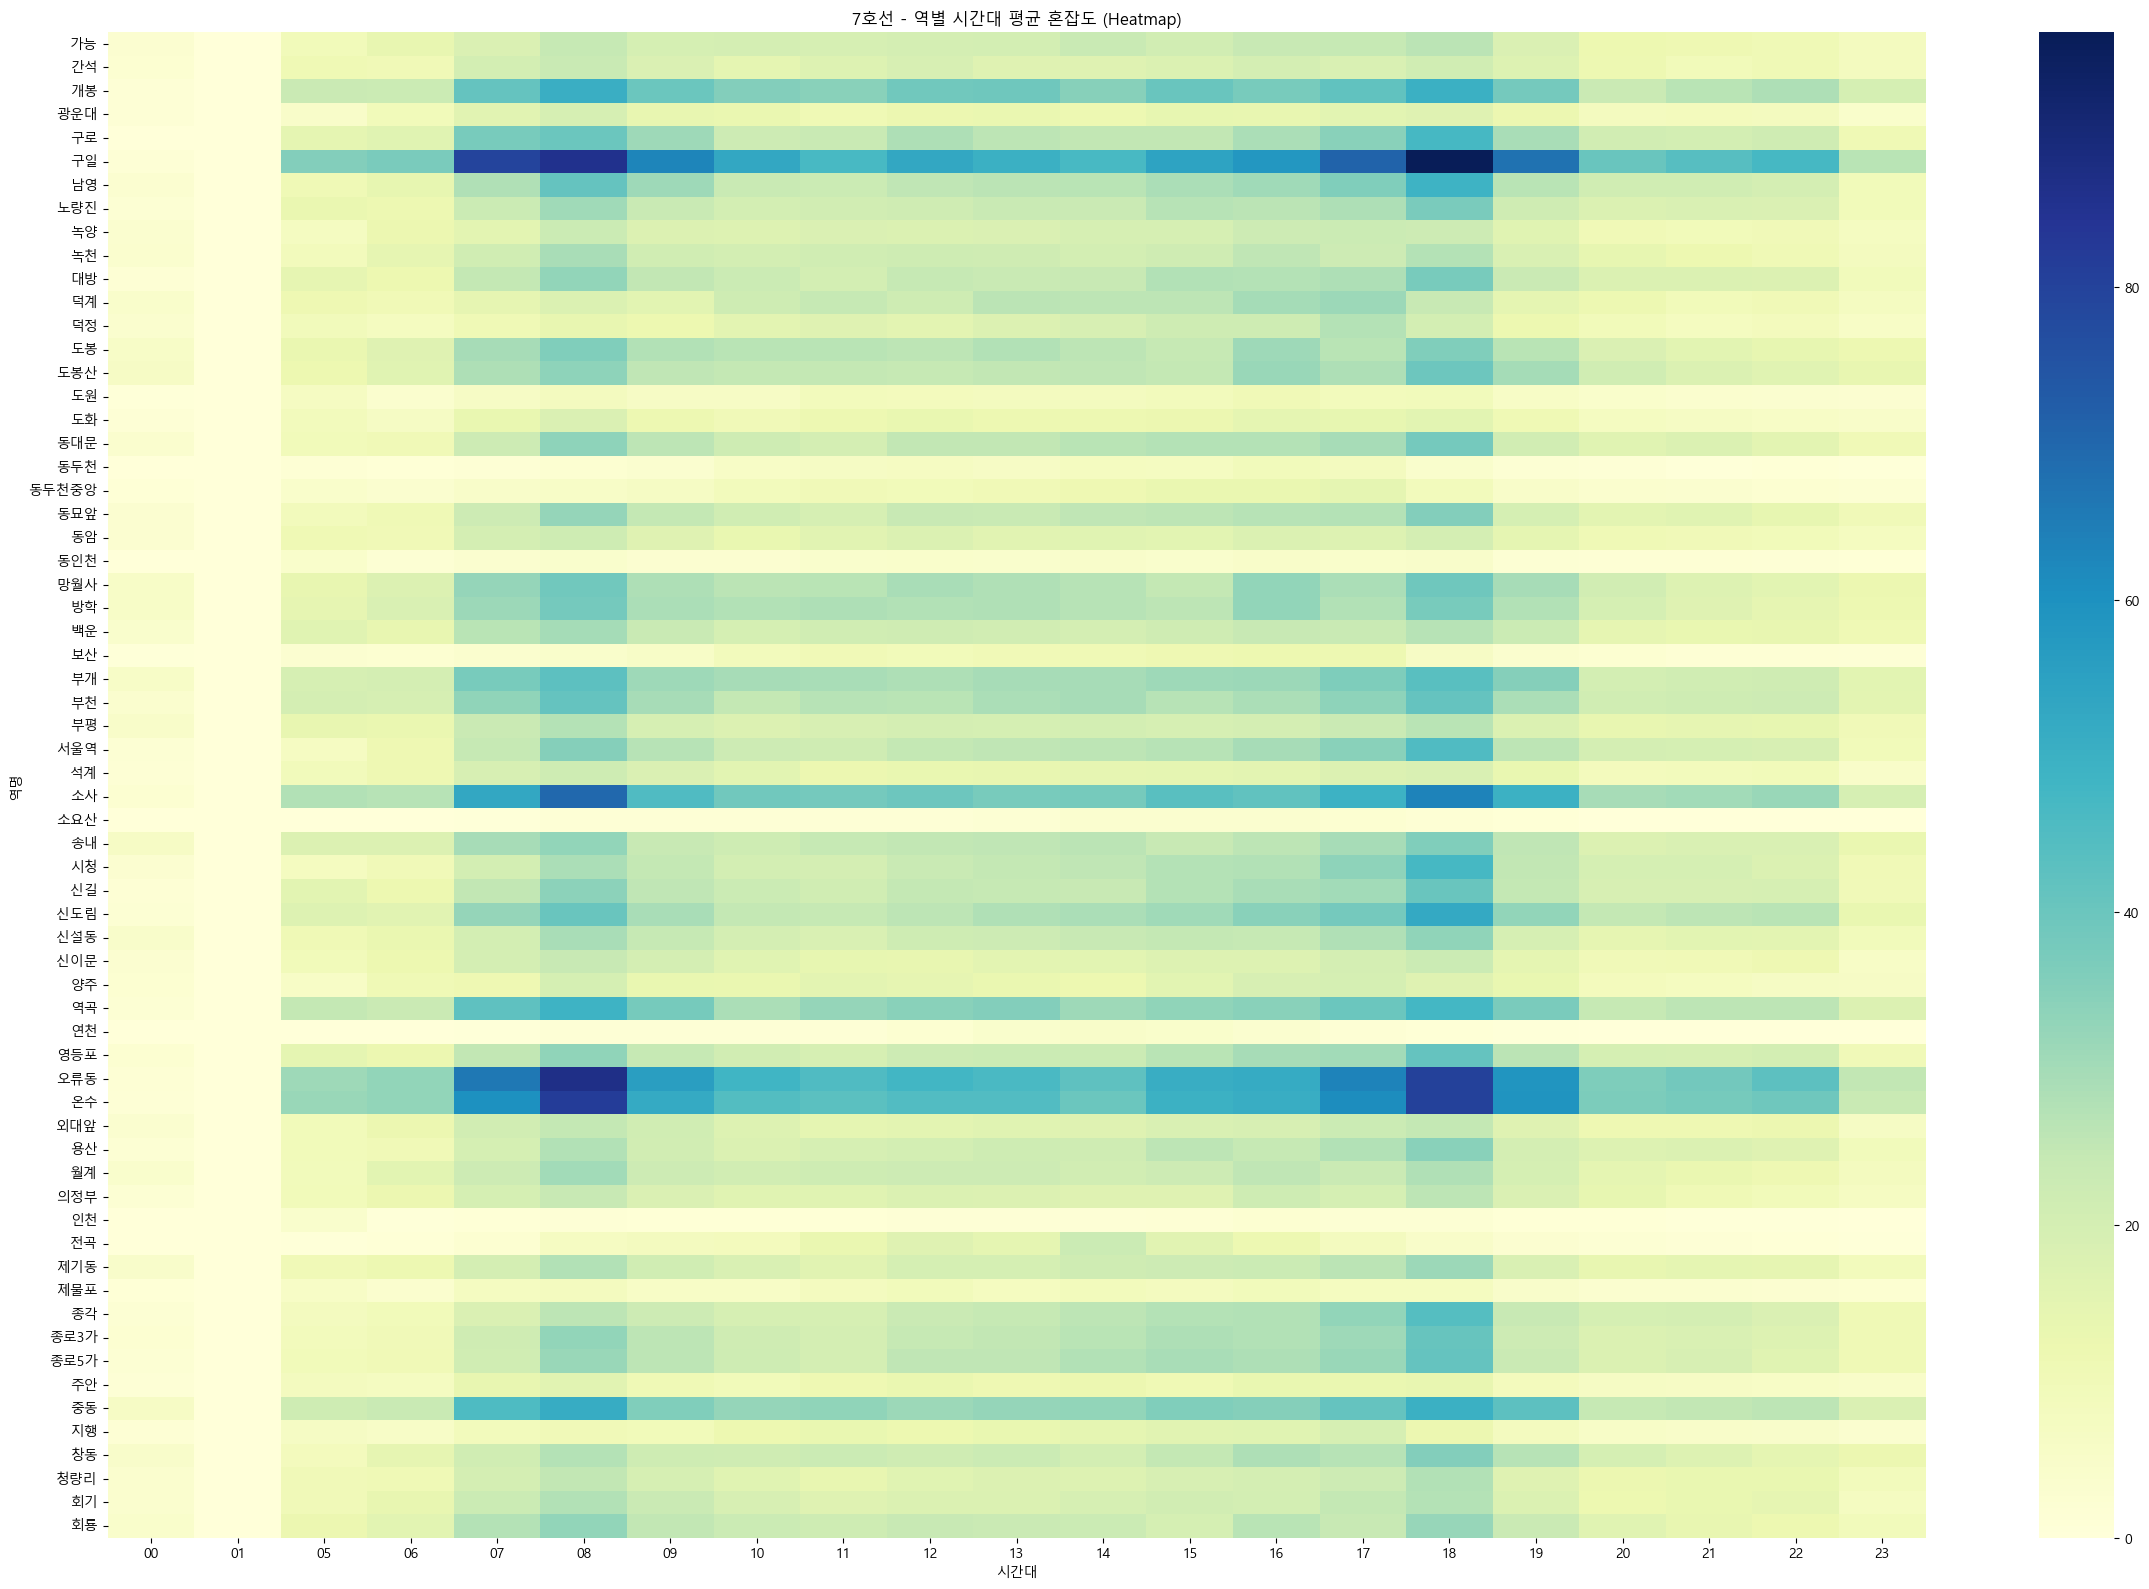

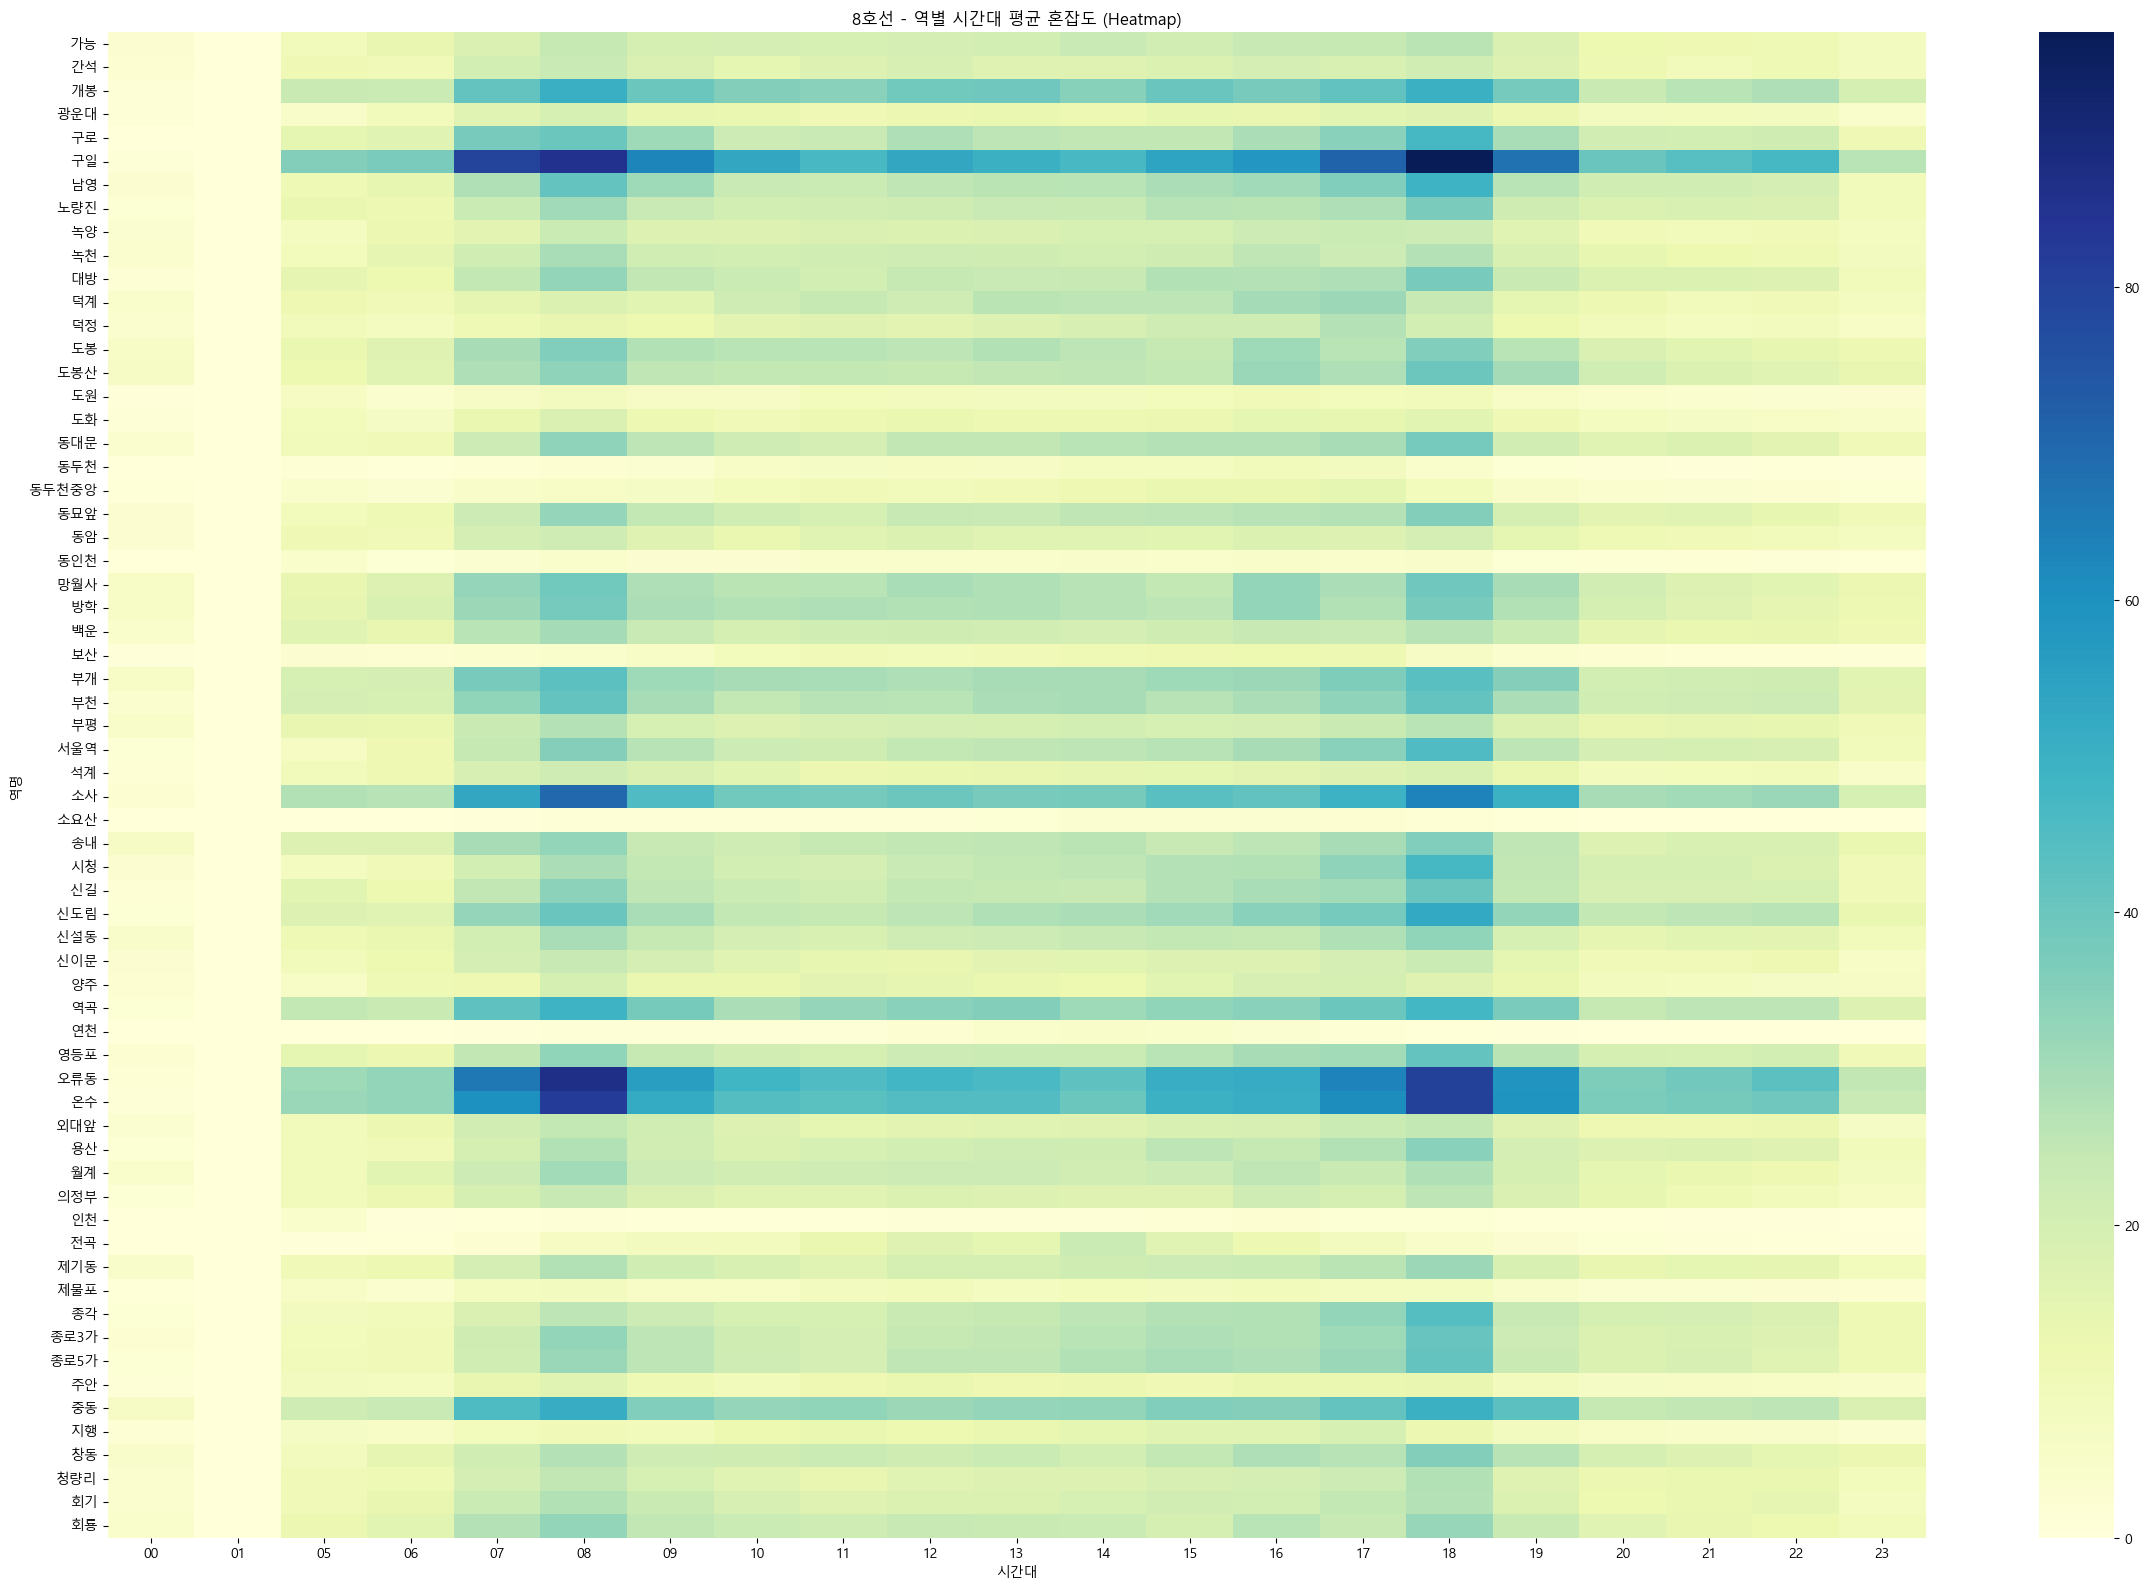

In [20]:
import seaborn as sns

data['시'] = data['시'].astype(int).apply(lambda x: f'{x:02}')
data2 = data.drop(['상하구분'], axis=1)
line_list = data2['호선'].unique()

for line in sorted(line_list):
    df_line = data2[data2['호선'] == line] 
    pivot_df = df_line.pivot_table(index='역명', columns='시', values='혼잡도', aggfunc='mean')
    plt.figure(figsize=(24, 16))
    sns.heatmap(pivot_df, cmap='YlGnBu', annot=False)
    plt.title(f'{line}호선 - 역별 시간대 평균 혼잡도 (Heatmap)')
    plt.xlabel('시간대')
    plt.ylabel('역명')
    plt.tight_layout()
    plt.show()


In [20]:
data1['hour'] = data1['시간'].dt.hour
data1['dayofweek'] = data1['시간'].dt.dayofweek
data1['month'] = data1['시간'].dt.month
data1 = data1.drop(columns=['시간'])

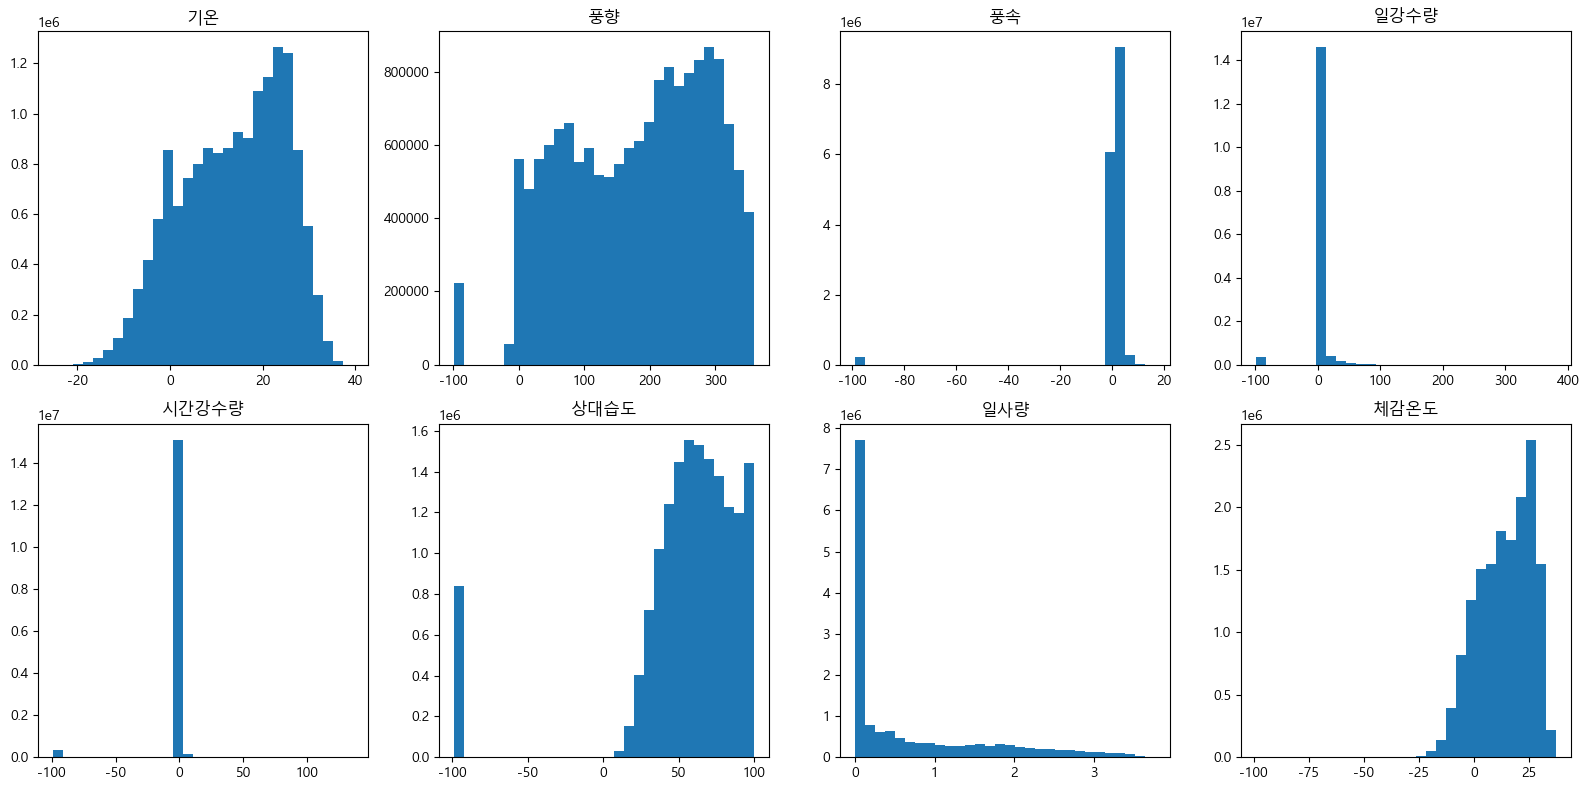

In [52]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

columns = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']

plt.figure(figsize=(16, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    plt.hist(data[col], bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14617036 entries, 4259 to 15653609
Data columns (total 20 columns):
 #   Column     Dtype  
---  ------     -----  
 0   호선         int64  
 1   역번호        int64  
 2   역명         object 
 3   상하구분       object 
 4   AWS지점코드    int64  
 5   기온         float64
 6   풍향         float64
 7   풍속         float64
 8   일강수량       float64
 9   시간강수량      float64
 10  상대습도       float64
 11  일사량        float64
 12  체감온도       float64
 13  혼잡도        float64
 14  승차총승객수     float64
 15  하차총승객수     float64
 16  미세먼지       float64
 17  hour       int32  
 18  dayofweek  int32  
 19  month      int32  
dtypes: float64(12), int32(3), int64(3), object(2)
memory usage: 2.1+ GB


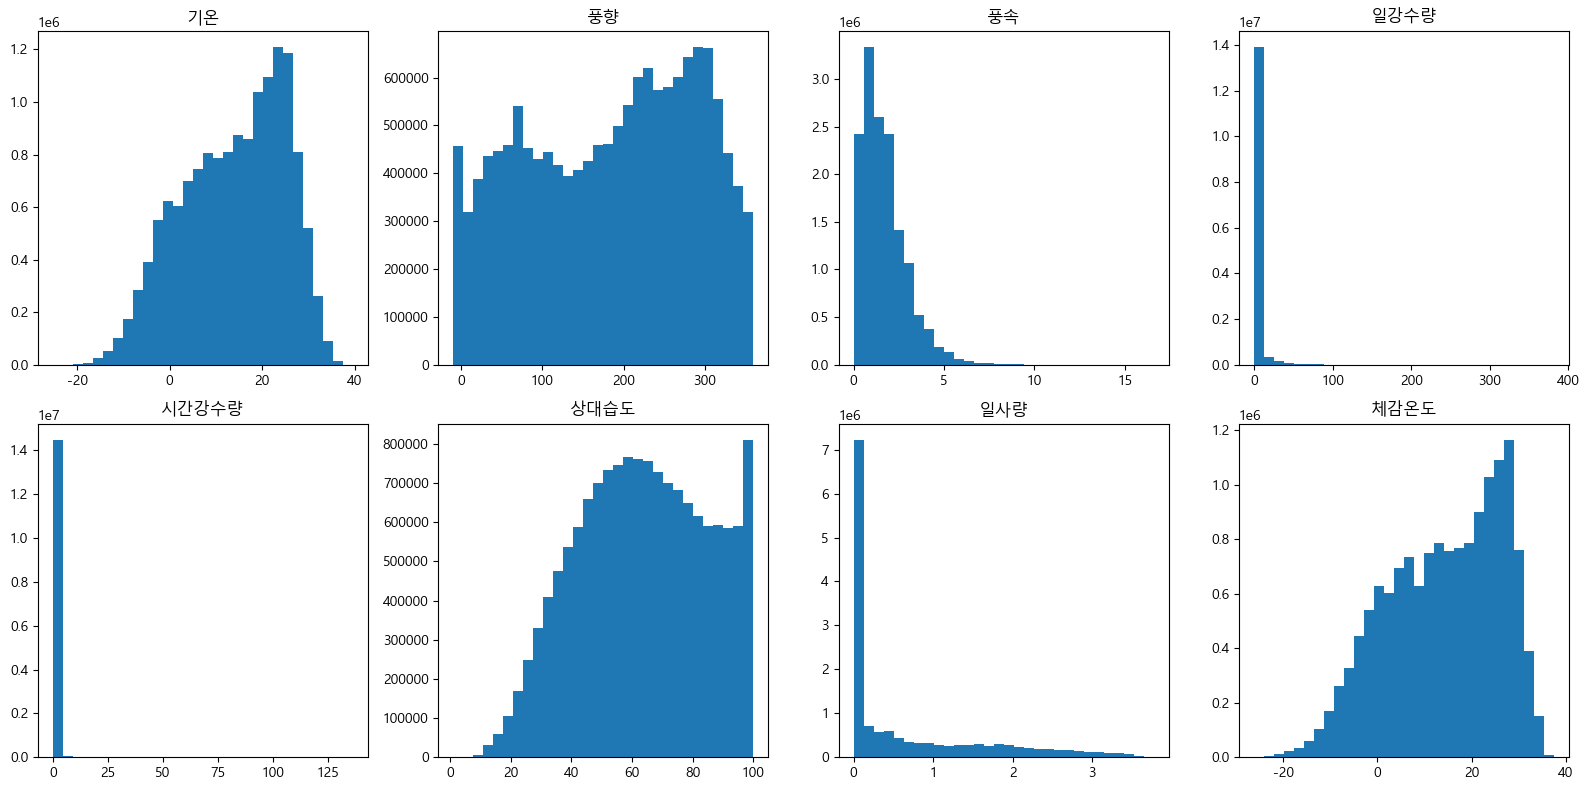

In [58]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

columns = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']

plt.figure(figsize=(16, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    plt.hist(data[col], bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [59]:
X=data.drop(['혼잡도'],axis=1)
y=data['혼잡도']

In [6]:
data.columns

Index(['시간', '호선', '역번호', '역명', '상하구분', 'AWS지점코드', '기온', '풍향', '풍속', '일강수량',
       '시간강수량', '상대습도', '일사량', '체감온도', '혼잡도', '승차총승객수', '하차총승객수', '미세먼지'],
      dtype='object')

In [9]:
data1=data.copy()
data1['일사량'] = data1['일사량'].apply(lambda x: 0 if x < -90 else x)
data1 = data1[data1['기온'] > -90]
data1 = data1[data1['풍향'] > -90]
data1 = data1[data1['일강수량'] > -90]
data1 = data1[data1['시간강수량'] > -90]
data1 = data1[data1['상대습도'] > -90]
data1 = data1[data1['체감온도'] > -90]

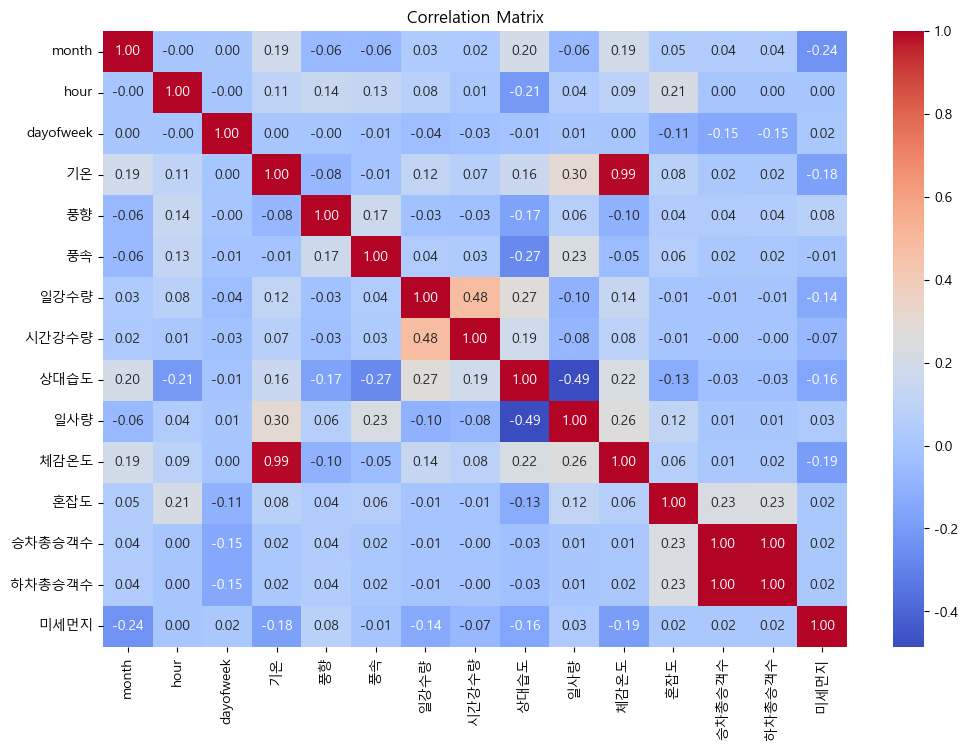

In [17]:
columns=['month','hour','dayofweek','기온', '풍향', '풍속', '일강수량',
       '시간강수량', '상대습도', '일사량', '체감온도', '혼잡도', '승차총승객수', '하차총승객수', '미세먼지']
plt.figure(figsize=(12,8))
sns.heatmap(data[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()